In [17]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [21]:
secretnum = '101101'

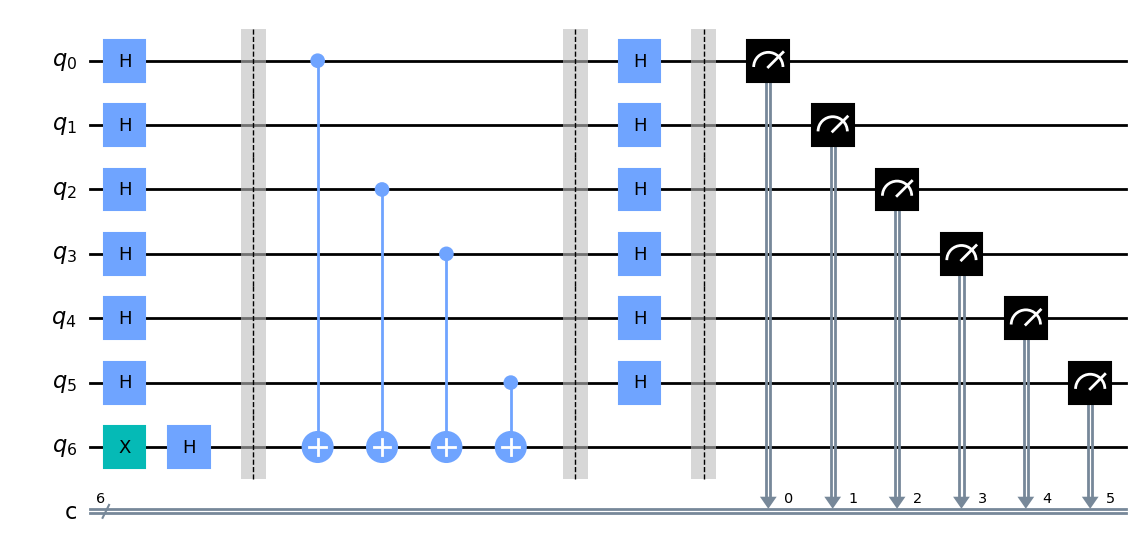

In [22]:
circuit = QuantumCircuit(len(secretnum)+1,len(secretnum))

circuit.h(range(len(secretnum)))
circuit.x(len(secretnum))
circuit.h(len(secretnum))
circuit.barrier()

for i, yesno in enumerate(reversed(secretnum)):
    if yesno=='1':
        circuit.cx(i,len(secretnum))

circuit.barrier()
circuit.h(range(len(secretnum)))
circuit.barrier()
circuit.measure(range(len(secretnum)),range(len(secretnum)))



circuit.draw(output='mpl')

In [23]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101101': 1}
